# ARIMA - SARIMA

# Ìndice

1. [Resumo e objetivos](#Resumo-e-objetivos)

- [Série temporal básica](#Série-temporal-básica)

    - [O que é estacionaridade?](#O-que-é-estacionaridade?)
    
    - [Suavização de séries temporais](#Suavização-de-séries-temporais)
        - [Rolling window](#Rolling-Window)
        - [Exponencial](#Exponencial)
        - [Transformações de Box-Cox](#Transformações-de-Box-Cox)
        
    - [Tedência e sazonalidade](#Tedência-e-sazonalidade)
        - [Lagged plot](#Lagged-plot)
        - [Retirando a tendência e a sazonalidade](#Retirando-a-tendência-e-a-sazonalidade)
            - [Diferença (Trend)](#Diferença-(Trend))
            - [Diferença (Seasonality)](#Diferença-(Seasonality))
            - [Decomposição clássica](#Decomposição-clássica)
        
    - [Checando a estacionaridade](#Checando-a-estacionaridade)
        - [Hipótese nula](#Hipótese-nula)
        - [ADF teste](#ADF)
        - [KSPP teste](#KSPP)
        - [Erro residual](#Erro-residual)

- [Série temporal](#Série-temporal)

    - [Random walk](#Random-walk)
        - [ACF e PACF](#ACF-e-PACF)
        
    - [ARIMA](#ARIMA)
    
    - [SARIMA](#SARIMA)
    
    - [Fazendo previsões](#Fazendo-previsões)
    
    - [Erro nas previsões](#Erro-nas-previsões)
        - [Porcentagem do erro](#Porcentagem-do-erro)
        - [Distribuição gaussiana](#Distribuição-gaussiana)
            - [ACF](#ACF)
            - [Histograma](#Histograma)
        - [Ljung-Box](#Ljung-Box)
        
    - [Erro entre modelos](#Erro-entre-modelos)
        - [AIC](#AIC)
        - [SIC](#SIC)
    
- [Referências](#Referências)

Explicar:
- [x] O que é estacionaridade?
- [x] Suavização das curvas
    - [x] Exponencial
    - [x] Moving Averange
    - [x] Transformação
- [x] Tedência e sazonalidade
    - [x] Lagged Plot
    - [x] Retirando a tendência e a sazonalidade
        - [x] Diferença (Trend)
        - [x] Diferença (Seasonality)
        - [x] Decomposição Clássica
- [x] Checando a estacionaridade
    - [x] Null hypothesis
    - [x] ADF teste
    - [x] KSPP teste
    - [x] Residual Error
- [ ] Série temporal
    - [ ] Random Walk
    - [ ] ACF e PACF
    - [ ] ARIMA
    - [ ] SARIMA
    - [ ] Forecasting
    - [ ] Erro de forecasting
        - [ ] Porcentagem do erro de forecasting
        - [ ] Distribuição gaussiana
            - [ ] Usar o ACF
            - [ ] Olhar para o histograma
        - [ ] Ljung-Box
    - [ ] Erro entre modelos
        - [ ] AIC
        - [ ] SIC
        
- [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)

TODO:

- [ ] O seasonal_decompose parace não fazer diferença quando escolho additive ou multiplicative, talvez se eu colocar as datas tudo fique normal.

# Resumo e objetivos

Tentei simplificar o máximo que consegui, mas o assunto é complicado para quem não tem uma base matemática boa.



[2]: https://www.quantstart.com/articles/Serial-Correlation-in-Time-Series-Analysis

Começar com:
- https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
- https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
- https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

# Carregando os arquivos

In [94]:
import pandas as pd
from pandas.plotting import lag_plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.tsa.api as smt

from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from statsmodels.tsa.seasonal import seasonal_decompose

path = 'data'

train = pd.read_csv(path + '/sales_train.csv.gz')
test = pd.read_csv(path + '/test.csv.gz').set_index('ID')
items = pd.read_csv(path + '/items.csv')
items_cat = pd.read_csv(path + '/item_categories.csv')
shops = pd.read_csv(path + '/shops.csv')
geo = pd.read_csv(path + '/geo_shop.csv')

# Série temporal básica

- [O que é estacionaridade?](#O-que-é-estacionaridade?)
    
    - [Suavização de séries temporais](#Suavização-de-séries-temporais)
        - [Rolling window](#Rolling-Window)
        - [Exponencial](#Exponencial)
        - [Transformações de Box-Cox](#Transformações-de-Box-Cox)
        
    - [Tedência e sazonalidade](#Tedência-e-sazonalidade)
        - [Lagged plot](#Lagged-plot)
        - [Retirando a tendência e a sazonalidade](#Retirando-a-tendência-e-a-sazonalidade)
            - [Diferença (Trend)](#Diferença-(Trend))
            - [Diferença (Seasonality)](#Diferença-(Seasonality))
            - [Decomposição clássica](#Decomposição-Clássica)
        
    - [Checando a estacionaridade](#Checando-a-estacionaridade)
        - [Hipótese nula](#Hipótese-nula)
        - [ADF teste](#ADF-teste)
        - [KSPP teste](#KSPP-teste)
        - [Erro residual](#Erro-residual)
        
    - [Considerações finais](#Considerações-finais)

### O que é estacionaridade?

[Artigo básico][1] [Artigo complexo][2] [ML][3]

[1]: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/
[2]: https://www.quantstart.com/articles/Serial-Correlation-in-Time-Series-Analysis
[3]: https://machinelearningmastery.com/time-series-data-stationary-python/

Uma série estritamente estacionária é uma série que não varia com o tempo, ou seja, sua média, variância e convariância não dependem do tempo. A série abaixo é estritamente estacionária:

![non-stationary](stat.png)

O que provavelmente não vai acontecer no mundo real, em geral temos que fazer varios ajustes para que a série se torne estacionária. Os gráficos abaixo mostram séries **não** estacionárias:

![non-stationary](non-stat.png)

1. O primeiro gráfico apresenta uma tendência de subida, portante sua média varia com o tempo.
2. O segundo gráfico apresenta uma dispersão maior com o passar do tempo. Então os máximos e minímos da função variam com o tempo, assim como sua variância.
3. O terceiro gráfico apresenta mais de um padrão de repetição, temos uma frequência oscilações curtas no começo e que se tornam mais longas com o tempo. Esse tipo de padrão é característicos de uma convariância dependente do tempo.

Essas figuras foram retiradas desse [site][1], que parece ter bastante coisa sobre séries temporais.

[1]: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

### Escolhendo uma loja

Este dataset não é muito bom para se fazer análises temporais porque estamos interessados na previsão de vendas no mês e só temos 34 meses. Séries temporais mais adquedas podem ser encontradas nestes kerneis: 
   - [Co2 Emission Forecast ARIMA](https://www.kaggle.com/berhag/co2-emission-forecast-with-python-seasonal-arima)
   - [Climate Change Forecast SARIMA](https://www.kaggle.com/leandrovrabelo/climate-change-forecast-sarima-model?utm_medium=email&utm_source=intercom&utm_campaign=datanotes-2019)
   
As análises vão ser feitas para uma única loja e vamos utilizar o número de itens vendidos por mês. Abaixo eu reuno o dataset todo e escolho a loja 37, ela tem uma quantidade de vendas razoáveis e parece não ser estacionária. Vou deixar abaixo uma imagem do dataset do primeiro kernel indicado, só para questão de comparação com o dataset que vamos utilizar aqui.

<img src="real_non-stat.png" alt="alt text" width="800" height="100">

In [2]:
# Unindo o dataset.
train_full = pd.merge(train, items, on='item_id', how='left')
train_full = pd.merge(train_full, items_cat, on='item_category_id', how='left')
train_full = pd.merge(train_full, shops, on='shop_id', how='left')
train_clean = train_full.drop(['date', 'item_name', 'shop_name', 'item_category_name'], axis=1)
train_clean['revenue'] = train_full['item_cnt_day'] * train_full['item_price']

In [3]:
# Agrupando por mês.
df = train_clean.pivot_table(index=['shop_id'], 
                             columns=['date_block_num'],
                             values=['item_cnt_day'],
                             aggfunc='sum', fill_value=0)

df.columns = df.columns.droplevel(0)

# Array com o número de meses:
months = train_clean['date_block_num'].nunique()

# Datas para serem colocadas no eixo x:
date_range = pd.date_range(start='1/2013', periods=months, freq='M')
date_range = [ str(date_range.year[month]) + '/' + str(date_range.month_name()[month]) for month in range(months)]

In [4]:
# Loja 37 é uma boa escolha.
shop = 37

items_sold = df.loc[shop, :]

In [5]:
trace1 = go.Scatter(
    x=date_range,
    y=items_sold,
    name='shop ' + str(shop),
)
fig = tools.make_subplots(rows=1, cols=1)

fig.append_trace(trace1, 1, 1)

fig['layout'].update(height=500, width=900, title='Nº de itens vendidos por mês',
                     xaxis = dict())
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]



> A quantidade de dados são bem diferentes entre os dois datasets.

Note que nesta última série temos uma tendência de queda nas vendas, a variância assume valores diferentes com o tempo e com toda certeza temos uma sazonalidade, i.e., temos uma variação no número de vendas todo mês de dezembro por causa do natal. Tudo isso torna a série não estacionária e podemos utilizar vários métodos para tentar torna-la estacionária.

### Suavização de séries temporais

Existem vários métodos para tornar uma série temporal mais suave e bem comportada, a maioria ajuda no controle da variância da série. Vou colocar aqui alguns exemplos mais simples.

#### Rolling Window

A ideia é utilizar o dataset da loja ($Y_t$) e gerar um novo dataset suavizado ($X_t$). Fazemos isso tirando a média entre os pontos $Y_t$ e outros $N-1$ valores passados. A equação para cada ponto $t$ é,

   - $X_t =( Y_t + Y_{t-1} + Y_{t-2} + \dots + Y_{t-N+1} )/ N$,

onde $X_t$ é o novo ponto, $N$ é o tamanho da janela escolhida e $Y_t$ é o ponto atual.

In [6]:
# Vamos escolher N=3.
window_size = 3

In [7]:
# Repare nas entradas do rolling().

items_sold_smoothed = items_sold.rolling(window = window_size, center=False).mean()

In [8]:
items_sold.head()

date_block_num
0    2399
1    2216
2    2629
3    1946
4    2019
Name: 37, dtype: int64

In [9]:
items_sold_smoothed.head()

date_block_num
0            NaN
1            NaN
2    2414.666667
3    2263.666667
4    2198.000000
Name: 37, dtype: float64

> Como não temos $3$ valores anteriores a primeira e a segunda entrada do dataset, o pandas retorna NaN.
> Se colocar center=True, fazemos a média olhando para $N/2$ valores passados e $N/2$ valores futuros.

Gráfico comparando a série original e após o rolling window.

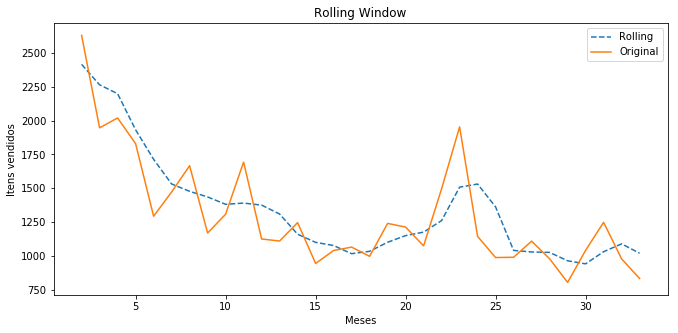

In [10]:
fig, ax1 = plt.subplots(1, figsize=(11,5))

ax1.set_title('Rolling Window')

ax1.plot(items_sold_smoothed, linestyle='--', label='Rolling')
ax1.plot(items_sold[window_size-1:], label='Original')
ax1.set_ylabel('Itens vendidos')
ax1.set_xlabel('Meses')
ax1.legend()

plt.show()

> **Obs.:**
- Repare que a série fica bem mais suave, isso pode ser bom ou ruim, no fim das contas podemos perder informação se escolhermos uma janela muito grande.
- Essa técnica é uma suavização linear, porque considera os pontos próximos como tendo o mesmo peso.

> Ainda tem uma tendência de queda.

#### Exponencial

Para cada $t$ na série $Y_t$, vamos pegar os valores passados e fazer um média ponderada (média com pesos), da seguinte forma,

 - $X_t = Y_t + (1 - \alpha)Y_{t-1} + (1 - \alpha)^2 Y_{t-2} + ...+ (1 - \alpha)^t Y_{0}$ / $\sum (1-\alpha)^i$.

A ideia é que o termo $(1-\alpha)$ seja menor do que $1$, para que valores muito distantes de $Y_t$ tenham um peso menor. Desta forma, estamos dizendo que valores em tempos muito distantes não influênciam em valores atuais da série, o que é verdade na maioria dos casos.


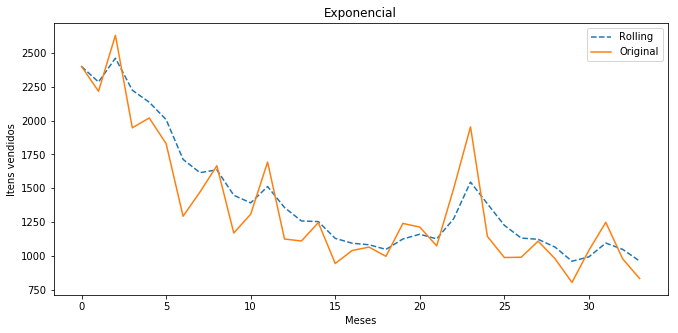

In [11]:
items_sold_exp_smooth = items_sold.ewm(alpha=0.4).mean()

fig, ax1 = plt.subplots(1, figsize=(11,5))

ax1.set_title('Exponencial')

ax1.plot(items_sold_exp_smooth, linestyle='--', label='Rolling')
ax1.plot(items_sold, label='Original')
ax1.set_ylabel('Itens vendidos')
ax1.set_xlabel('Meses')
ax1.legend()

plt.show()

#### Transformações de Box-Cox

Existem vários tipos de transformações que podem ser feitas para suavizar uma série, o conjunto abaixo faz uma transformação diferente para cada valor de $\lambda$.

   - $ X_t = (Y_t^\lambda - 1) / \lambda $, para $\lambda > 0$,
   - $ X_t = \text{ln}(Y_t)$,  para $ \lambda = 0$.

In [12]:
lmbd = 0
items_sold_box_cox = boxcox(items_sold, lmbda=lmbd)

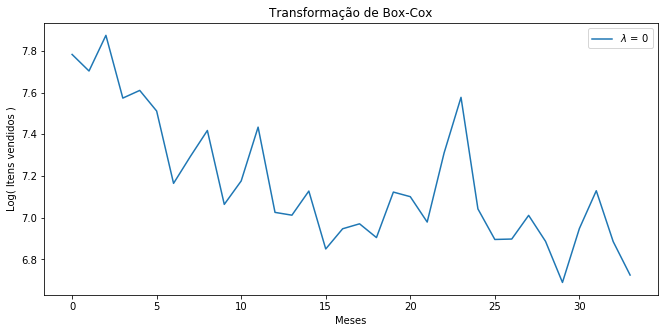

In [13]:
fig, ax1 = plt.subplots(1, figsize=(11,5))

ax1.set_title('Transformação de Box-Cox')

ax1.plot(items_sold_box_cox, label= '$\lambda$ = ' + str(lmbd))
ax1.set_ylabel('Log( Itens vendidos )')
ax1.set_xlabel('Meses')
ax1.legend()

plt.show()

> Ainda tem uma tendência de queda.

### Tedência e sazonalidade

Algumas operaçoẽs simples podem retirar a tendência e a sazonalidade da série.
  - [Lagged plot](#Lagged-plot)
  - [Retirando a tendência e a sazonalidade](#Retirando-a-tendência-e-a-sazonalidade)
      - [Diferença (Trend)](#Diferença-(Trend))
      - [Diferença (Seasonality)](#Diferença-(Seasonality))
      - [Decomposição clássica](#Decomposição-clássica)

#### Lagged plot

O lagged plot serve para visualizar alguns padrões de correlações entre os pontos. Por exemplo, o gráfico com $\text{lag}=1$, coloca no eixo $x$ os pontos $Y_t$ e no eixo $y$ os pontos $Y_{t+1}$, se existir alguma correlação podemos observar o gráfico de uma reta ou alguma outra estrutura.

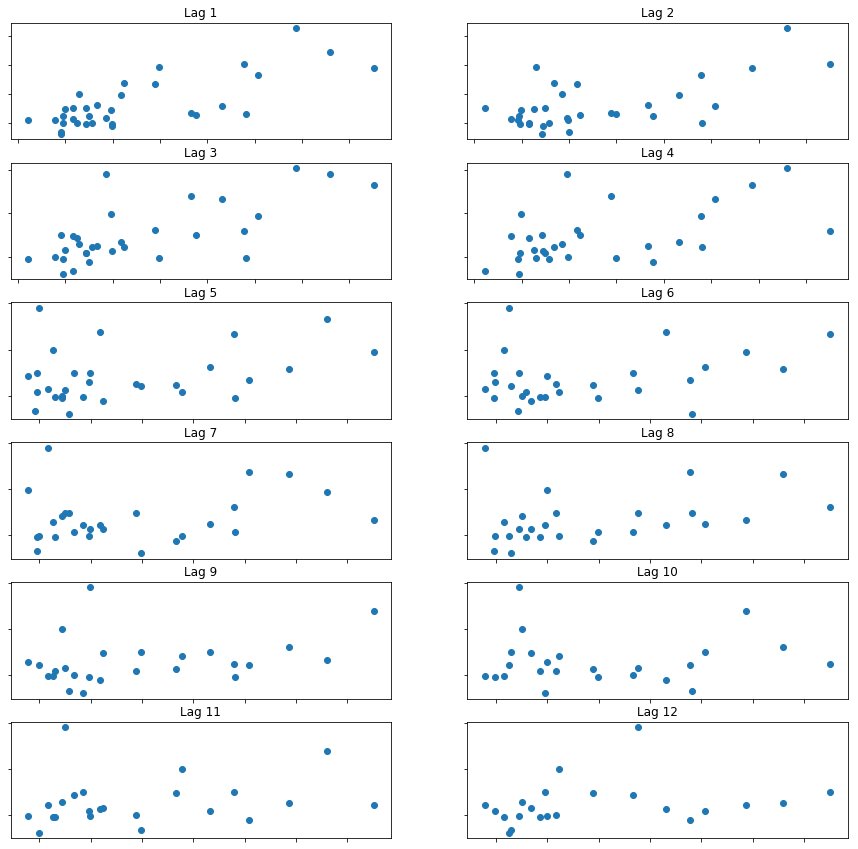

In [14]:
nrows = 6
ncols = 2

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,15))

lag_cont = 0

for x in range(nrows):
    for y in range(ncols):
        
        lag_cont = lag_cont + 1
        lag_plot(items_sold, lag=lag_cont, ax=ax[x,y])
        
        ax[x, y].set_xlabel('')
        ax[x, y].set_ylabel('')
        ax[x, y].set_title('Lag ' + str(lag_cont))
        ax[x, y].set_yticklabels([])
        ax[x, y].set_xticklabels([])

**Obs.:**

   - Parece que até o lag=4 temos um acumulo de pontos bem próximos no começo do gráfico, indicando alguma correlação.
   - Nos plots com lag=10 e lag=12 parece existir alguma sazonalidade.

### Retirando a tendência e a sazonalidade

Usar a diferença entre valores é o melhor jeito de retirar sazonalidade ou tendências de uma série.

#### Diferença (Trend)

Para aplicar uma diferenciação de primeira-ordem, fazemos para cada $Y_t$,

- $X_t = Y_t - Y_{t-1}$.

Para segunda ordem, 

- $X_t = (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2})$.

**A função diff utilizada abaixo só serve para a primeira ordem.**

In [15]:
dif = 1
items_sold_diff_t = items_sold.diff(dif).dropna(axis=0)

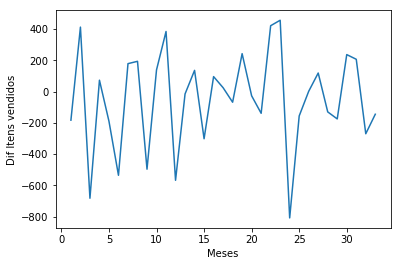

In [16]:
figure, ax1 = plt.subplots(1)

ax1.plot(items_sold_diff_t)

ax1.set_ylabel('Dif Itens vendidos')
ax1.set_xlabel('Meses')

plt.show()

O gráfico não tem nenhuma tendência de queda, o que já ajuda. Mas a sazonalidade ainda está aí. Vou fazer o gráfico com o $lag=1$ só para ver se aparece alguma estrutura.

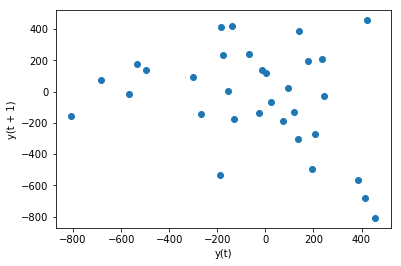

In [17]:
lag_plot(items_sold_diff_t, lag=1)

**Obs.:**
- Parece que tem alguma estrutura.
- Com $lag=12$ é praticamente uma reta.

#### Diferença (Seasonality)

Para retirar a sazonalidadae fazemos, 

- $X_t = Y_t - Y_m$,

onde $m$ é o período. Vou escolher $m=12$ por causa do natal.

**Aqui podemos trocar o valor de dif sem problemas.**

In [18]:
dif = 12
items_sold_diff_s = items_sold.diff(dif).dropna(axis=0)

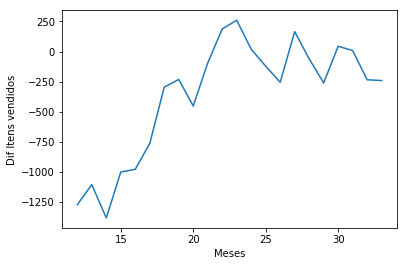

In [19]:
figure, ax1 = plt.subplots(1)

ax1.plot(items_sold_diff_s)

ax1.set_ylabel('Dif Itens vendidos')
ax1.set_xlabel('Meses')

plt.show()

**Obs.:**
- Essa tendência de alta apareceu porque ao aplicarmos a diff(12), desconsideramos os primeiros 12 e era eles que tinham apresentavam a queda.

#### Decomposição clássica

Existem dois modelos para a decomposição clássica,

- Modelo Aditivo: $y_t = T_t + S_t + R_t$,
- Modelo multiplicativo: $y_t = T_t * S_t * R_t$,

onde $T_t$ é componente de tendência da série, $S_t$ é a sazonalidade e $R_t$ é o resíduo.

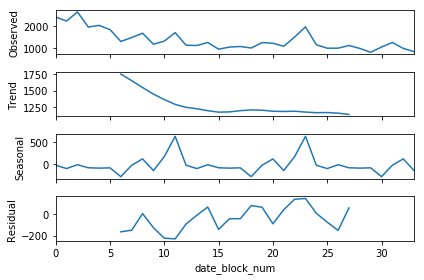

In [20]:
decomposed_results = seasonal_decompose(items_sold, model='additive', freq=12)
decomposed_results.plot()
plt.show()

Lagged plot para $T_t$.

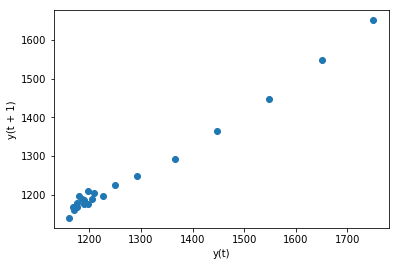

In [21]:
df = pd.DataFrame(decomposed_results.trend).dropna()

lag_plot(df)

plt.show()

> A correlação entre os pontos tá bem clara.

Lagged plot para $S_t$.

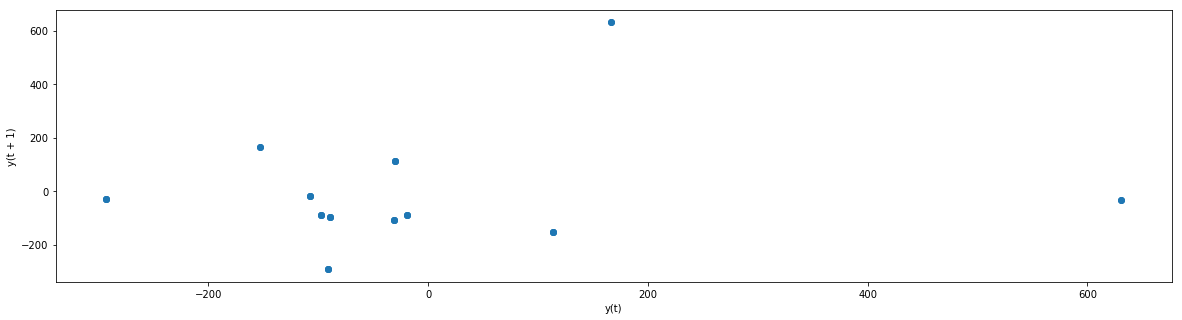

In [22]:
df = pd.DataFrame(decomposed_results.seasonal).dropna()
plt.figure(figsize=(20,5))
lag_plot(df)
plt.show()

> Por ter poucos pontos não tem como afirmar com certeza, mas parece que tem um padrão oscilatório.

> **O plot de $R_t$ vai ficar para a próxima sessão.**

### Checando a estacionaridade

Nem sempre vai ser possível checar no olho se a série é estacionária ou não. Precisamos utilizar alguns testes matemáticos para isso. 
   
   - [Hipótese nula](#Hipótese-nula)
   - [ADF teste](#ADF-teste)
   - [KSPP teste](#KSPP-teste)
   - [Erro residual](#Erro-residual)

#### Hipótese nula

É melhor começar com um exemplo para entedermos melhor como a hipótese nula é utilizada.

**Rolando um d6**
Suponha que um pesquisador queira identificar se um dado de $6$ lados está ou não viciado. Falando de outra forma, o pesquisador quer saber se a probabilidade de termos como resultado qualquer um dos números é de $1/6$. Então as hipóteses são:

   - $H_0$: O dado não é viciado e a probabilidade de um número qualquer ser o resultado é de $1/6$.
   - $H_1$: O dado é viciado.

Para testar essas hipóteses com base em dados, o pesquisador rola $10$ vezes o dado e o obtem $6$ como resultado todas as vezes. A probabilidade disso acontecer é de $0,000002\%$ (é só multiplicar $1/6$, $10$ vezes). Então, o pesquisador conclui que a chance disso acontecer naturalmente é muito pequena, logo, o dado está viciado e a hipótese $H_0$ é rejeitada.

Neste exemplo a nossa hipótese nula era o $H_0$ e ao rejeitarmos ela, com base em dados, assumimos que $H_1$ deve ser verdade. No exemplo acima, como a probabilidade do evento ocorrer era muito pequena, não precisamos definir uma probabilidade miníma para rejeitarmos a hipótese $H_0$. Em geral, se a probabilidade for menor do que $5\%$ podemos dizer com certa convicção que $H_0$ está errada.

> **Obs.:**
    - Tiramos conclusões a partir de dados, então temos que ter uma amostragem significante. Seria insuficiente jogar o dado somente uma vez.

####  <a name="ADF"></a> ADF (Augmented Dickey Fuller) test

Para testar se a série é estacionária, utilizamos o teste ADF e escolhemos como nível de significância $5\%$. As hipótese são:

- Null hypothesis ($H_0$): Existe uma raiz unitária, indicando que a série não é estacionária.
- Outra opção ($H_1$): Não existe uma raiz unitária, indicando que a série é estacionária.

> Não vou entrar em detalhes sobre o motivo da raiz unitária, é muita conta para chegar no resultado.

In [23]:
# Função que faz o teste e mostra os resultados de forma organizada.

def adf_teste(time_series, regression, maxlag=0):
    
    #Fazendo o teste.
    adf_test = adfuller(time_series, regression=regression, maxlag=maxlag, autolag=None)

    # Arrumando as variáveis para o print.
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value',
                                                 '#Lags Used',
                                                 'Number of Observations Used'])
    for percent, value in adf_test[4].items():
        
        adf_output['Critical Value (%s)' % percent] = value
        
    print('Resultados ADF: \n')
    print(adf_output)

Para que a série seja estacionária, é preciso que o p-value seja menor que $0.05$ ($5\%$).

In [24]:
adf_teste(items_sold, 'c', maxlag=0)

Resultados ADF: 

Test Statistic                 -2.658821
p-value                         0.081439
#Lags Used                      0.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


Como já era esperado, a série não é estacionária.

#### <a name="KPSS"></a>  KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test

Repare que a hipótese nula do KPSS é diferente da ADF.

- Null hypothesis ($H_0$): A série é estacionária entorno de uma tendência.
- Outra opção ($H_1$): A série tem uma raiz unitária, indicando que não é estacionária.

> Uma série que é estacionária em torno de uma tendência possui todas as características de estacionaridade já apresentadas, porém vai apresentar uma tendência de queda ou subida.

In [25]:
# Função que faz o teste e mostra os resultados de forma organizada.

def kpss_teste(time_series, regression, lag=0):
    
    #Fazendo o teste.
    kpss_test = kpss(time_series, regression=regression, lags=lag)

    # Arrumando as variáveis para o print.
    kpss_output = pd.Series(kpss_test[0:3], index=['Test Statistic','p-value',
                                                 '#Lags Used'])
    for percent, value in kpss_test[3].items():
        
        kpss_output['Critical Value (%s)' % percent] = value
        
    print('Resultados ADF: \n')
    print(kpss_output)

In [26]:
kpss_teste(items_sold, 'c', lag=0)

Resultados ADF: 

Test Statistic           1.808891
p-value                  0.010000
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/ronaldo/anaconda3/envs/Data_Science/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1276: InterpolationWarning:

p-value is smaller than the indicated p-value



Concluímos que a série não é estacionária.

#### Erro residual

O erro residual é o que sobra ao retirarmos a tendência e sazonalidade da série. O erro residual é completamente aleatório, então não deve carregar nenhuma tendência ou sazonalidade e seguir uma distribuição gaussiana. Podemos usar isso para checar se a decomposição simples realmente conseguiu separar $T_t$ e $S_t$.

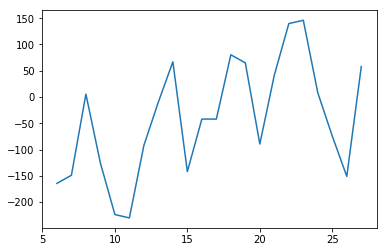

In [27]:
# Erro residual.

plt.plot(decomposed_results.resid)
plt.show()

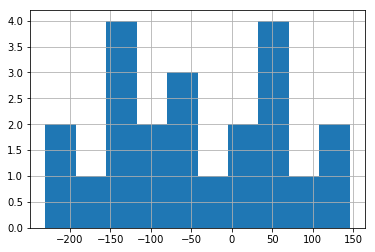

In [28]:
# Histograma do erro residual.

decomposed_results.resid.hist(bins=10)
plt.show()

Por termos poucos pontos não tem como ter certeza se é uma distribuição gaussiana ou não.

> Parece que não é.

In [29]:
adf_teste(decomposed_results.resid.dropna(), 'c', maxlag=0)

Resultados ADF: 

Test Statistic                 -2.768940
p-value                         0.062849
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


A série não é estacionária.

In [30]:
kpss_teste(decomposed_results.resid.dropna(), 'c', lag=0)

Resultados ADF: 

Test Statistic           0.712572
p-value                  0.012403
#Lags Used               0.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


A série não é estacionária em torno de uma tendência.

Então, olhando os resultados parece que a decomposição da série não foi suficiente para separar a tendência e a sazonalidade completamente.

#### Resumo das constantes que podem ser inclusas no teste.

**ADF:**

Constant and trend order to include in regression

* ’c’ : constant only (default)
* ’ct’ : constant and trend
* ’ctt’ : constant, and linear and quadratic trend
* ’nc’ : no constant, no trend

**KPSS:**

Indicates the null hypothesis for the KPSS test
* ‘c’ : The data is stationary around a constant (default)
* ‘ct’ : The data is stationary around a trend

# Série temporal

   - [Random walk](#Random-walk)
        - [ACF e PACF](#ACF-e-PACF)
        
   - [ARIMA](#ARIMA)
    
   - [SARIMA](#SARIMA)
    
   - [Fazendo previsões](#Fazendo-previsões)
    
   - [Erro nas previsões](#Erro-nas-previsões)
        - [Porcentagem do erro](#Porcentagem-do-erro)
        - [Distribuição gaussiana](#Distribuição-gaussiana)
            - [ACF](#ACF)
            - [Histograma](#Histograma)
        - [Ljung-Box](#Ljung-Box)
        
   - [Erro entre modelos](#Erro-entre-modelos)
        - [AIC](#AIC)
        - [SIC](#SIC)

### Random walk

- Falar o que é o resíduo e com ele é relacionada a um ruído branco.
    - Mostrar uma guassiana de um ruído branco. média e desvio padrão.
    - Comparar com o encontrado.

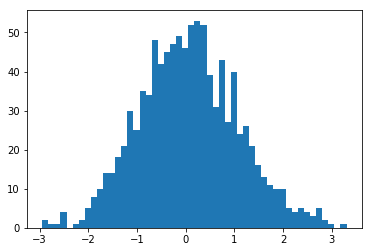

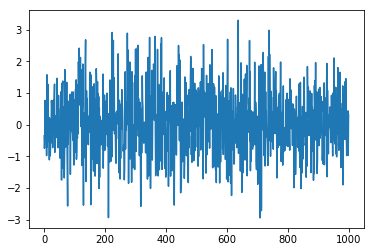

In [50]:
white_noise = np.random.normal(size=1000)
plt.figure(1)
plt.hist(white_noise, bins=50)
plt.figure(2)
plt.plot(white_noise)
plt.show()

#### ACF e PACF

A correlação mede a relação entre duas variáveis e autocorrelação mede a relação entre a própria variável e seus termos antigos. É uma ideia parecida com o que vimos no lagged plot na sessão anterior, só que menos visual e mais matemático. Então, a autocorrelação com um lag de $k$ períodos é dada por,

 - $\rho_k = \text{Cov}(Y_t, Y_{t+k}) / \text{Var}(Y_t)$,
 
Cov é a covariância entre os temors da série $Y_t$ e $Y_{t+k}$ e Var é a variância de $Y_t$. A função de autocorrelação (ACF) é dada pelo conjunto $[\rho_0, \rho_1, \rho_2, ..., \rho_k]$. 

Existe uma outra função importante, a função de correlação parcial (PACF), que mede a relação entre $Y_t$ e $Y_{t+k}$ após excluirmos os efeitos dos lags $1,2,3,4,5,...,k-1$.

Para um ruído branco, não esperamos observamos qualquer correlação entre $Y_t$ e $Y_{t+k}$. Então, ao olharmos para o gráfico de ACF e PACF não devemos observar poucos pontos proeminentes acima da faixa azul. Essa faixa é uma médida de erro ($5\%$) e é esperado que alguns pontos possam ultrapassa-la um pouco, mas é só por uma questão de fluação estatística.

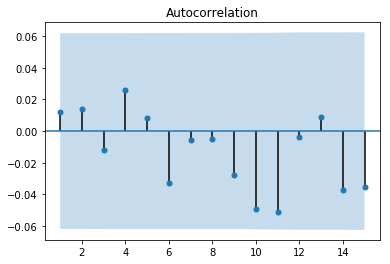

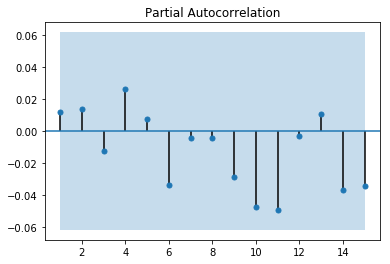

In [86]:
aux = white_noise

plot_acf(aux, lags=15, zero=False)
plot_pacf(aux, lags=15, zero=False)
plt.show()

Comparando o resíduo que encontramos anteriormente ao utilizarmos a decomposição clássica, vemos que sua PACF não condiz com PACF encontrada em um ruído branco.   

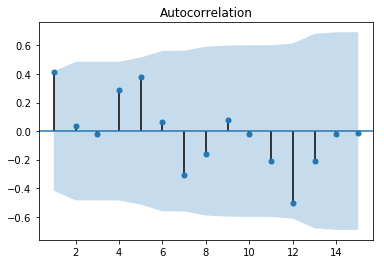

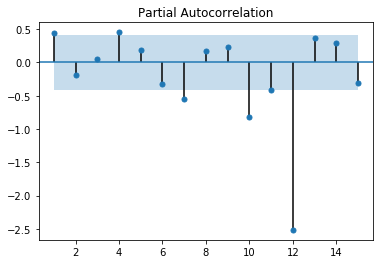

In [85]:
aux = decomposed_results.resid.dropna()

plot_acf(aux, lags=15, zero=False)
plot_pacf(aux, lags=15, zero=False)
plt.show()

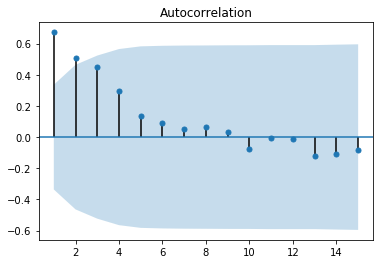

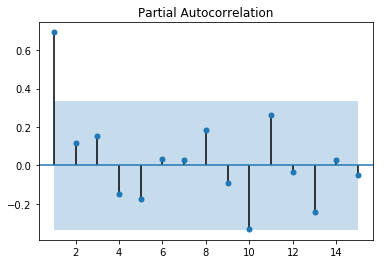

In [98]:
aux = items_sold

plot_acf(aux, lags=15, zero=False)
plot_pacf(aux, lags=15, zero=False)
plt.show()

### ARIMA

In [356]:
p = 1
q = 1
d = 0

In [357]:
model1 = smt.ARIMA(items_sold.values[:-3], order=(p, d, q))
fitted1 = model1.fit(method='mle', trend='c')

In [358]:
print(fitted1.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   31
Model:                     ARMA(1, 1)   Log Likelihood                -221.387
Method:                           mle   S.D. of innovations            299.072
Date:                Tue, 16 Apr 2019   AIC                            450.775
Time:                        20:23:46   BIC                            456.511
Sample:                             0   HQIC                           452.645
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1519.9880    384.191      3.956      0.000     766.988    2272.988
ar.L1.y        0.9321      0.085     11.015      0.000       0.766       1.098
ma.L1.y       -0.3572      0.191     -1.872      0.0

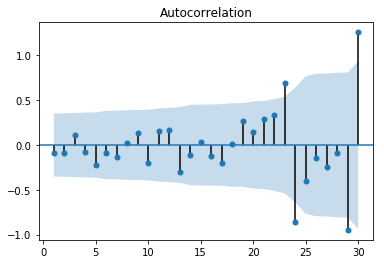

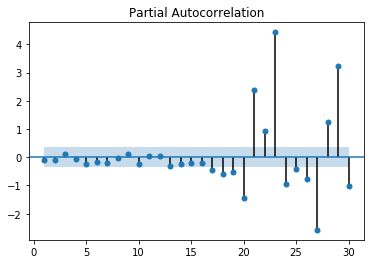

In [359]:
plot_acf(fitted1.resid, unbiased=True, zero=False)
plot_pacf(fitted1.resid, zero=False)
plt.show()

In [360]:
step = 3

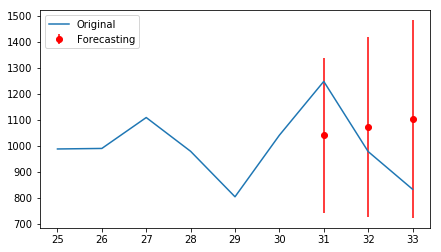

In [373]:
prediction = fitted1.forecast(steps=step)

plt.figure(figsize=(7,4))
plt.plot(items_sold[25:], label='Original', linestyle='-')
plt.errorbar(x=[31,32,33], y=prediction[0], yerr=prediction[1], fmt='o', color='r', label='Forecasting')

plt.legend(loc='upper left')
plt.show()

In [374]:
# Mean Absolute Percentage Error (MAPE)
np.mean(np.abs(1.0 - items_sold[-3:] / prediction[0])) * 100.

17.765283651379796

### SARIMA

In [489]:
s_p = 0
s_q = 1
s_d = 0

s_P = 1
s_D = 0
s_Q = 2
s_s = 1 

In [490]:
model2 = smt.SARIMAX(items_sold[:-3], order=(s_p, s_d, s_q), seasonal_order=(s_P, s_D, s_Q, s_s))
fitted2 = model2.fit()

/home/ronaldo/anaconda3/envs/Data_Science/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [491]:
print(fitted2.summary())

                                 Statespace Model Results                                
Dep. Variable:                                37   No. Observations:                   31
Model:             SARIMAX(0, 0, 1)x(1, 0, 3, 1)   Log Likelihood                -233.909
Date:                           Tue, 16 Apr 2019   AIC                            479.818
Time:                                   20:45:35   BIC                            488.422
Sample:                                        0   HQIC                           482.623
                                            - 31                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9745      0.268     -3.642      0.000      -1.499      -0.450
ar.S.L1        0.9994      0.012     83.325

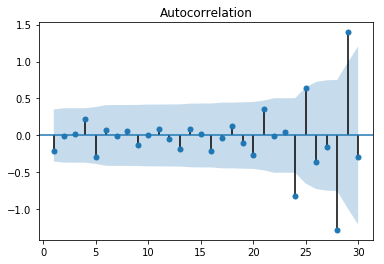

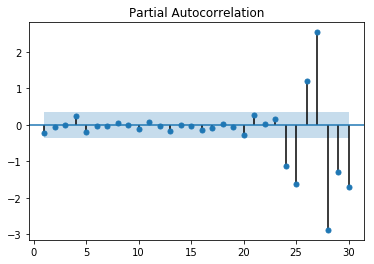

In [492]:
plot_acf(fitted2.resid, unbiased=True, zero=False)
plot_pacf(fitted2.resid, zero=False)
plt.show()

In [493]:
step = 3

In [494]:
prediction

31    644.730541
32    116.130766
33      0.000000
dtype: float64

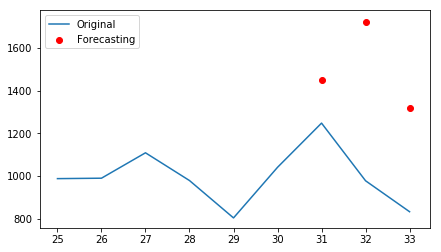

In [495]:
prediction = fitted2.forecast(steps=step)

plt.figure(figsize=(7,4))
plt.plot(items_sold[25:], label='Original', linestyle='-')
plt.scatter(x=[31,32,33], y=prediction, color='r', label='Forecasting')

plt.legend(loc='upper left')
plt.show()

In [496]:
# Mean Absolute Percentage Error (MAPE)
np.mean(np.abs(1.0 - items_sold[-3:] / prediction)) * 100.

31.33502736420083

### Fazendo previsões

### Erro nas previsões

#### Porcentagem do erro

#### Distribuição gaussiana

##### ACF

##### Histograma

#### Ljung-Box

### Erro entre modelos

#### AIC

#### SIC

### Considerações finais

# Apéndice

### O que é a hipótese nula e como é utilizado no ADF teste

**p-value** é a probabilidade do evento ocorrer.

- Se p-value < 5% o evento é pouco provável, ou seja, podemos considerar que não ocorre.

O que queremos mostrar é que, olhando para os dados que temos, $H_0$ é pouco provável que aconteça, logo $H_1$ é acotence.

livro https://www.stata.com/manuals13/tsdfuller.pdf

https://en.wikipedia.org/wiki/P-value#cite_note-7
The p-value is used in the context of null hypothesis testing in order to quantify the idea of statistical significance of evidence.[note 1] Null hypothesis testing is a reductio ad absurdum argument adapted to statistics. In essence, a claim is assumed valid if its counter-claim is improbable.

As such, the only hypothesis that needs to be specified in this test and which embodies the counter-claim is referred to as the null hypothesis (that is, the hypothesis to be nullified). A result is said to be statistically significant if it allows us to reject the null hypothesis. That is, as per the reductio ad absurdum reasoning, the statistically significant result should be highly improbable if the null hypothesis is assumed to be true. The rejection of the null hypothesis implies that the correct hypothesis lies in the logical complement of the null hypothesis. However, unless there is a single alternative to the null hypothesis, the rejection of null hypothesis does not tell us which of the alternatives might be the correct one.


The smaller the p-value, the higher the significance because it tells the investigator that the hypothesis under consideration may not adequately explain the observation. The null hypothesis {\displaystyle H} H is rejected if any of these probabilities is less than or equal to a small, fixed but arbitrarily pre-defined threshold value {\displaystyle \alpha } \alpha , which is referred to as the level of significance.

**One roll of a pair of dice**
Suppose a researcher rolls a pair of dice once and assumes a null hypothesis that the dice are fair, not loaded or weighted toward any specific number/roll/result; uniform. The test statistic is "the sum of the rolled numbers" and is one-tailed. The researcher rolls the dice and observes that both dice show 6, yielding a test statistic of 12. The p-value of this outcome is 1/36 (because under the assumption of the null hypothesis, the test statistic is uniformly distributed) or about 0.028 (the highest test statistic out of 6×6 = 36 possible outcomes). If the researcher assumed a significance level of 0.05, this result would be deemed significant and the hypothesis that the dice are fair would be rejected.

In this case, a single roll provides a very weak basis (that is, insufficient data) to draw a meaningful conclusion about the dice. This illustrates the danger with blindly applying p-value without considering the experiment design.

### O andar do bêbado

Explicar o random walk

https://www.stata.com/manuals13/tsdfuller.pdf
- Pure Random Walk (Yt = Yt-1 + εt ) Random walk predicts that the value at time "t" will be equal to the last period value plus a stochastic (non-systematic) component that is a white noise, which means εt is independent and identically distributed with mean "0" and variance "σ²." Random walk can also be named a process integrated of some order, a process with a unit root or a process with a stochastic trend. It is a non-mean-reverting process that can move away from the mean either in a positive or negative direction. Another characteristic of a random walk is that the variance evolves over time and goes to infinity as time goes to infinity; therefore, a random walk cannot be predicted.
- Random Walk with Drift (Yt = α + Yt-1 + εt ) If the random walk model predicts that the value at time "t" will equal the last period's value plus a constant, or drift (α), and a white noise term (εt), then the process is random walk with a drift. It also does not revert to a long-run mean and has variance dependent on time.
- Deterministic Trend (Yt = α + βt + εt ) Often a random walk with a drift is confused for a deterministic trend. Both include a drift and a white noise component, but the value at time "t" in the case of a random walk is regressed on the last period's value (Yt-1), while in the case of a deterministic trend it is regressed on a time trend (βt). A non-stationary process with a deterministic trend has a mean that grows around a fixed trend, which is constant and independent of time.
- Random Walk with Drift and Deterministic Trend (Yt = α + Yt-1 + βt + εt ) Another example is a non-stationary process that combines a random walk with a drift component (α) and a deterministic trend (βt). It specifies the value at time "t" by the last period's value, a drift, a trend and a stochastic component. (To learn more about random walks and trends, see our Financial Concepts tutorial.)

# Referências

Citadas no texto:

- [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)
- [Co2 Emission Forecast ARIMA](https://www.kaggle.com/berhag/co2-emission-forecast-with-python-seasonal-arima)
- [Climate Change Forecast SARIMA](https://www.kaggle.com/leandrovrabelo/climate-change-forecast-sarima-model?utm_medium=email&utm_source=intercom&utm_campaign=datanotes-2019)

Outras:

- O material parece bem embasado e tem um carater mais técnico: [QuantStart](https://www.quantstart.com/articles#time-series-analysis)
- Mais um material técnico: [Fuqua School of Business](http://people.duke.edu/~rnau/411home.htm)
- Passo a passo para time series forecasting: [Comprehensive guide to creating time series forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/) <- Esse site parece bom.
- [Univariate versus Multivariate](https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/)

- Outro site mais técnico: [Forecasting: Principles and Practice](https://otexts.com/fpp2/non-seasonal-arima.html)
- [1](https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/) <- Knn